# Setting Up Your Environment

This notebook contains some guidelines for the students to prepare programming environments for the upcomming seminars and home assignments. During our seminars we will mostly work in IPython Notebook, however sometimes we may switch to MatLab. Homeworks also can be submitted only as IPython Notebooks or $\LaTeX$ reports with Python source code.

(We are using Python 2.7.8, not 3.x.x)

### Step 1: Install IPython Notebook

I suggest you to install free [Anaconda](https://store.continuum.io/cshop/anaconda/) Python distribution which already includes all necessary Python packages and modules - IPython, NumPy, SciPy, IPython, Matplotlib and **NetworkX** (version 1.9.1, there are compatibility problems with later versions) . Simply download appropriate installer for your OS and follow the proposed steps.

Run comman in IPython
!pip install networkx==1.9.1

A small tutorial for the NetworkX and other useful Python modules will be just in a minute.. Now let's deal with MatLab.

### Step 2*: Download Additional MatLab Packages

MatLab is a great computational environment, however it does not poses good instruments to operate with networks and graphs. Fortunately you can download [MatLab Boost Graph Library](https://www.cs.purdue.edu/homes/dgleich/packages/matlab_bgl/) which contains almost all graph utilities that will help you with assignments. To start using MatLabBGL algorithms simply set path to the downloaded folder.

Matlab is also sick in graph visualisation. To this purpose you can download [GraphViz](http://www.graphviz.org/) software and [Matlab interface](https://github.com/graphviz4matlab/graphviz4matlab/) for it. All install instructions are presented on the corresponding web-pages.

# Tutorial on NetworkX and more...

During this course you will mostly operate with graph structures and matrices. Also you should be able to plot some figures and make conclusions based on them.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
%matplotlib inline

Networks can be described in several formats e.g. adjacency matrix, edge list, etc. One of the most complete graph representations is [GML](https://en.wikipedia.org/wiki/Graph_Modelling_Language) format which look more or less like XML. See an example:

<pre><code>graph
[
  node
  [
   id A
   label "Node A"
  ]
  node
  [
   id B
   label "Node B"
  ]
  node
  [
   id C
   label "Node C"
  ]
   edge
  [
   source B
   target A
   label "Edge B to A"
  ]
  edge
  [
   source C
   target A
   label "Edge C to A"
  ]
]
</code></pre>

Thankfully, NetworkX supports almost all of recent network representations. Let's load a very famous [_Zachary's Karate Club_](http://networkdata.ics.uci.edu/data/karate/) network. Nodes in this network represent members of the club and edges between them occur if two persons also frequently communicate outside club's activities. Sadly, the organisation has splitted out into two groups due to conflict and misunderstanding between its leaders.

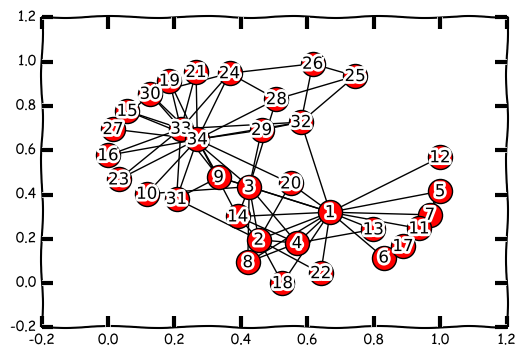

In [2]:
G = nx.read_gml(path = 'karate.gml')
nx.draw_networkx(G)

*draw_network* command has several options to improve the view of the network. For instance, let's make nodes with greater degree bigger and more colorfull.

You may need to use "dict(nx.degree(G))" and "list(k.values/keys())"

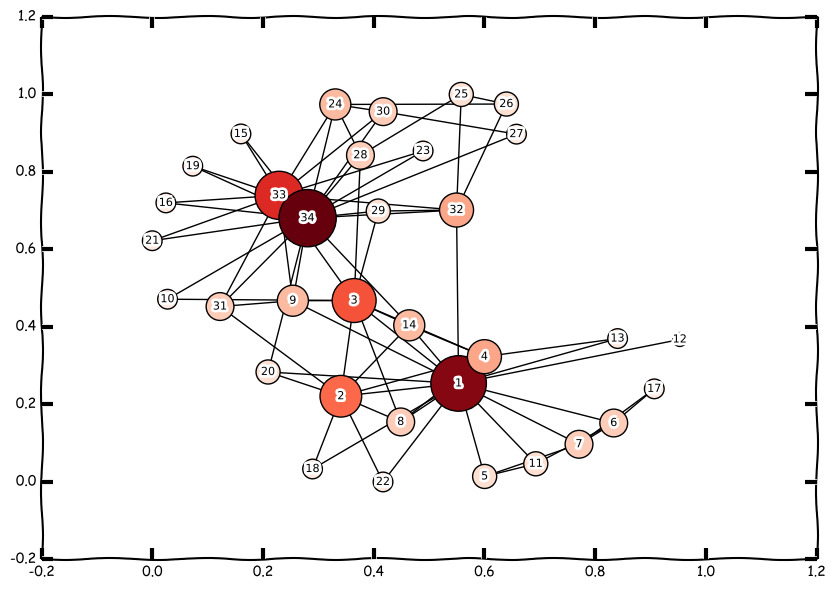

In [3]:
k = nx.degree(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=k.keys(),
                 node_size = [d*100 for d in k.values()],
                 node_color=k.values(),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

Now we can clearly observe two nodes with highest degree centrality: 1 and 34. Exactly these two most important club members are responsible for the breakdown.

We also might be interested in node degree distribution and network's adjacency matrix:

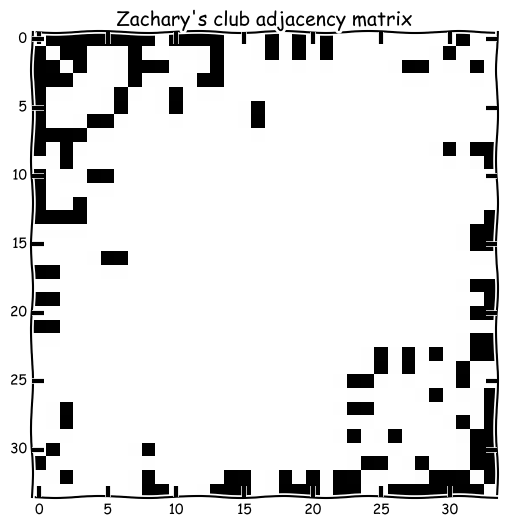

In [4]:
# load adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool) 
k = G.degree()
# alternatevly you can find k as k = np.sum(A, axis=0)

# sort nodes according to degree
id_sort = np.array(sorted(k, key = k.get, reverse=True))
k_sort = np.array(k.values())
k_sort = k_sort[id_sort-1]

# show adjacency matrix
plt.figure(1, figsize=(6, 6))
plt.imshow(A,
           cmap="Greys",
           interpolation="none"
           )
plt.title('Zachary\'s club adjacency matrix', fontsize=14)

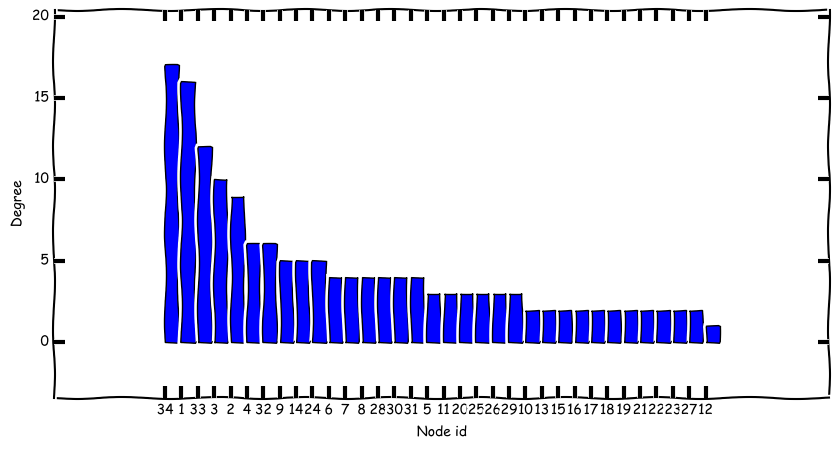

In [5]:
# show node degrees
plt.figure(1, figsize=(10, 5))
plt.bar(np.arange(34), k_sort)
plt.xticks(np.arange(34), id_sort)
plt.margins(0.2)
plt.ylabel('Degree')
plt.xlabel('Node id')

Now we have meet some basics of plotting and data manipulations in *networkX*. For more details visit the following web-pages:

* [NetworkX Documentation](http://networkx.github.io/documentation/latest/)
* [PyPlot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Matrix manimulation cheat-sheet](http://sebastianraschka.com/Articles/2014_matrix_cheatsheet_table.html)

# Exercises

### Task 1. Linear regression with NumPy

Download [dataset](https://www.hse.ru/data/2016/03/15/1127648561/bikinis.txt) and import it with *NumPy*. There you will find a table **D** with 2901 rows and 5 columns. Set y = D[:,0] and X = D[:, 1:].

For this task you have to fit a least-squares linear regression model $\hat{y} = X\hat{\beta}$, where

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$
The residuals of the model are agreed to be calculated as
$$ \text{res} = y - \hat{y} $$

    1. Download dataset
    2. Fit the model
    3. Make two plots: 
        3.1. Choose two features of dataset and plot fitted line against them
        3.2. Make residuals against prediction plot
        
__hint: DO NOT USE NUMPY's MATRICES. Use arrays and np.dot(A,B) instead of matrix multiplication A*B__

In [6]:
# Write your code here
#
#
#

# load data
D = np.loadtxt('bikinis.txt')
y = D[:,0]
X = D[:,1:]

# Find regression coefs
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

# Make predictions
yt = X.dot(Beta)

# Calculate residuals
res = y - yt

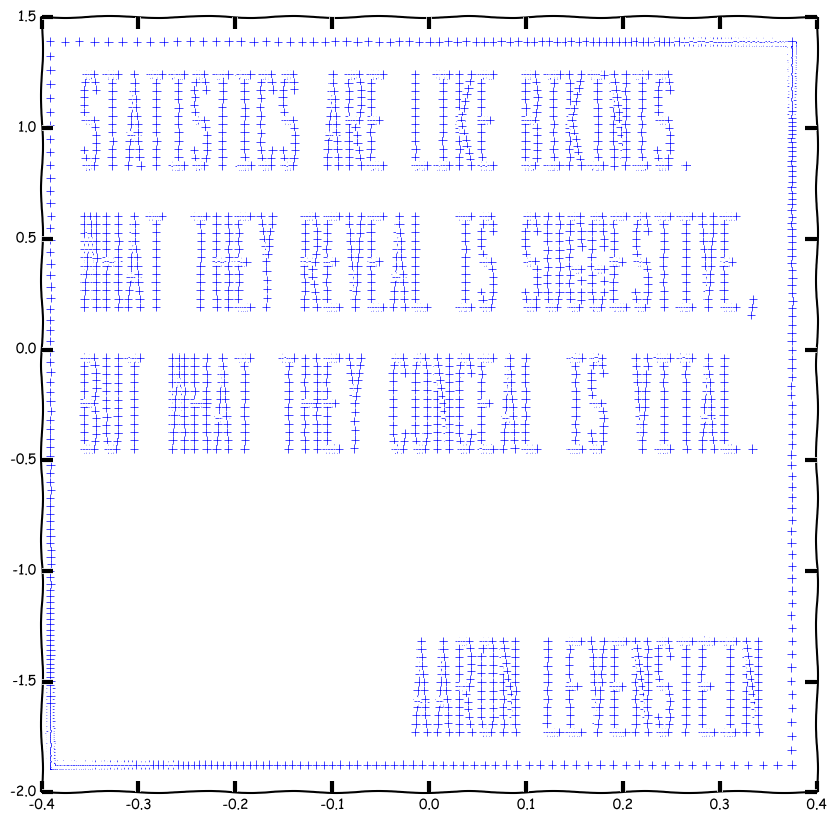

In [7]:
# Plot <resuduals against preditions>
plt.figure(figsize=(10,10))
plt.plot(yt, res, '+b')

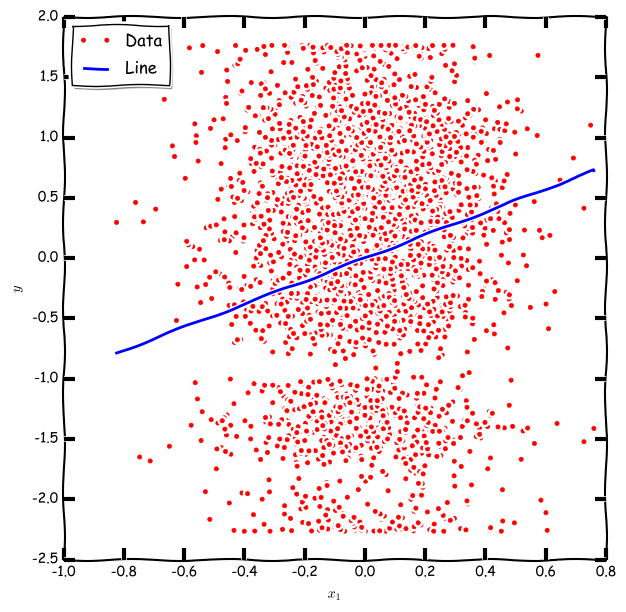

In [8]:
# Choose 2 dims and plot predictions agains the line
X1 = X[:,0]
idx = np.argsort(X1)
yt1 = X1[idx].dot(Beta[0])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.plot(X1, y, '.r', label='Data') 
ax.plot(X1[idx], yt1, 'b', label='Line')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
ax.legend(loc='upper left', shadow=True)

### Task 2. Look at your Facebook Network

To download .gml file with your facebook friend network you may use [getnet](http://snacourse.com/getnet) app.
 or use the script from [VK import](https://github.com/MakarovIA/networks/blob/master/Project-1/download_vk_graph.ipynb)
    1. Import your Facebook network
    2. Now play with it!
        2.1. Draw your network
        2.2. Output your network's order and size
        2.3. Draw the degree distribution (histogram)
        2.4 Find nodes with the highest degrees. Who are these people?
        2.5 Find connected components of your network. Interpret them.

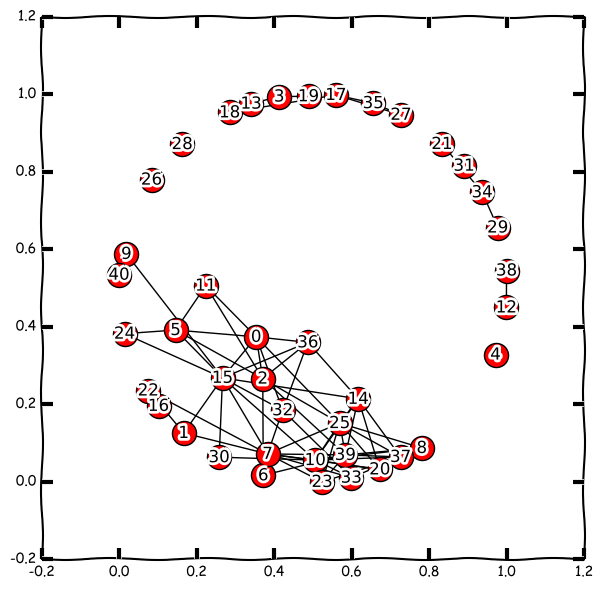

In [10]:
# Write your code here
#
#
#

# Loading network
G = nx.read_gml('network.gml')

# Draw it!
pos = nx.spring_layout(G, dim = 2, iterations=100)
plt.figure(figsize =(7,7))
nx.draw_networkx(G, pos)

In [11]:
print 'Network order {0:d}, Network size {1:d}'.format(G.order(), G.size())

Network order 41, Network size 75


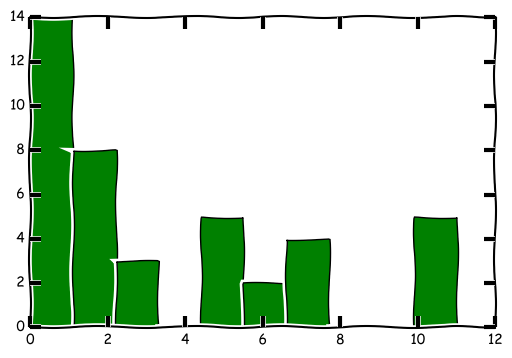

In [12]:
# Degree distr
k = G.degree()
k = np.array(k.values())
n, bins, patches = plt.hist(k, bins = 10, facecolor='g')

In [13]:
# Find nodes with highest degree
idx = np.argsort(k)
idx = idx[::-1]
k_sorted = k[idx]
v1 = G.node[idx[0]]
print v1['label']

95031707


In [14]:
# Find connected components
CC = nx.connected_components(G)

CC0 = sorted(nx.connected_components(G), key = len, reverse=True)

for v in CC0:
    print v

[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 15, 20, 22, 23, 24, 25, 30, 32, 33, 36, 37, 39]
[17, 18, 27, 35]
[19, 3, 13]
[34, 21, 29]
[12, 38]
[4]
[16]
[26]
[28]
[31]
[40]


In [15]:
SG = G.subgraph(CC0[0])
nx.radius(SG)

3

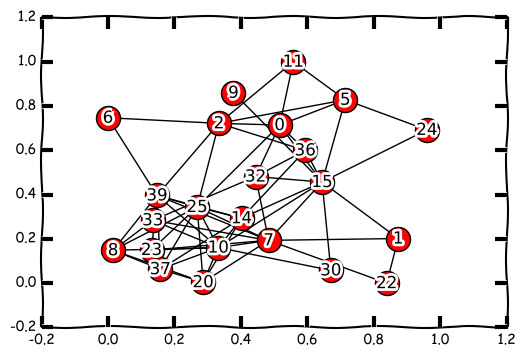

In [16]:
nx.draw_networkx(SG)